<br><font size = 40> NSFW VIDEO DETECTOR </font><br>
<br>Taking references from : 
https://www.pyimagesearch.com/2019/07/15/video-classification-with-keras-and-deep-learning/ <br>

Used my image classifier over a condom 
As Government band Condom ads on tv between 6 am to 10pm as they are indecent<a href = "https://www.thehindu.com/news/national/govt-bans-condom-ads-from-6-am-to-10-pm-because-they-are-indecent/article21461765.ece"> see here </a><br>
<br> So are they really indecent? I ran my model over a condom ad and found yes they really are indecent as my classifier identify it as porn and sexy on many frames.
Check the video in Readme

In [0]:
import cv2
from keras.models import load_model
import numpy as np
from collections import deque
import warnings
warnings.filterwarnings("ignore")

In [0]:
model = load_model("/content/drive/My Drive/nsfw/Final_weights.h5")

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
labels = {0 : "Neutral", 1 : "Porn", 2 : "Sexy"}

In [0]:
size = 128
# input_vid = "2.mp4"
output_vid = "1.mp4"

In [0]:
# Mean Subtraction
# mean = np.array([123.68, 116.779, 103.939][::1], dtype="float32")
Q = deque(maxlen=size)

<IPython.core.display.Javascript object>

[0.9952799  0.00156294 0.00315721]


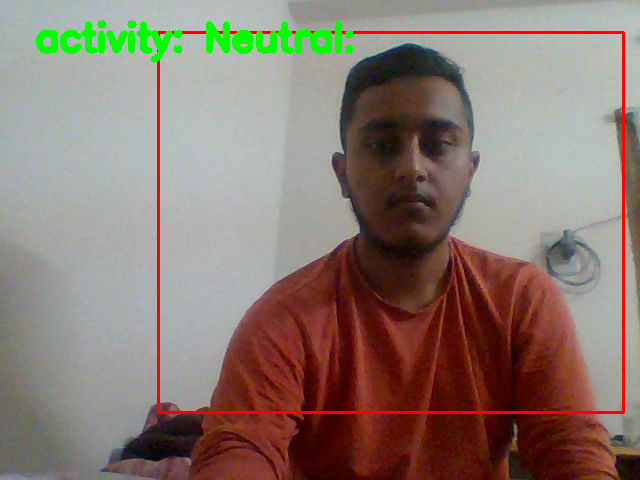

[INFO] cleaning up...


In [40]:
from google.colab.patches import cv2_imshow
import imutils

# vs = cv2.VideoCapture(0)
vs = cv2.VideoCapture(take_photo())
writer = None
(W, H) = (None, None)
 
# loop over frames from the video file stream
while True:
    # read the next frame from the file
    (grabbed, frame) = vs.read()
 
    # if the frame was not grabbed, then we have reached the end
    # of the stream
    if not grabbed:
        break
 
    # if the frame dimensions are empty, grab them
    if W is None or H is None:
        (H, W) = frame.shape[:2]

    # frame=imutils.resize(frame, width=min(100, frame.shape[1])) 
    fc = cv2.CascadeClassifier("drive/My Drive/nsfw/haarcascade_upperbody.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    
    upper=fc.detectMultiScale(gray,1.1,1)

    for (a,b,c,d) in upper:
      cv2.rectangle(frame,(a,b),(a+c,b+d),(0,0,255),2)
    output = frame.copy()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = frame/255.0
    frame = cv2.resize(frame, (224, 224)).astype("float32")
    
#     frame -= mean
    
    # make predictions on the frame and then update the predictions
    # queue
    preds = model.predict(np.expand_dims(frame, axis=0))[0]
    print(preds)
    Q.append(preds)

    # perform prediction averaging over the current history of
    # previous predictions

    results = np.array(Q).mean(axis=0)
    i = np.argmax(preds)
    label = labels[i]
    # draw the activity on the output frame
    text = "activity: {}:".format(label)
    cv2.putText(output, text, (35, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (0, 255, 0), 5)

    # check if the video writer is None
    if writer is None:
        # initialize our video writer
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
        writer = cv2.VideoWriter(output_vid, fourcc, 30, (W, H), True)

    # write the output frame to disk
    writer.write(output)

    # show the output image
    cv2_imshow(output)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break
        
# release the file pointers
print("[INFO] cleaning up...")
# writer.release()
vs.release()

In [55]:

# vs = cv2.VideoCapture(0)
vs = cv2.VideoCapture('/content/drive/My Drive/nsfw/3.mp4')
writer = None
(W, H) = (None, None)
 
# loop over frames from the video file stream
while True:
    # read the next frame from the file
    (grabbed, frame) = vs.read()
 
    # if the frame was not grabbed, then we have reached the end
    # of the stream
    if not grabbed:
        break
 
    # if the frame dimensions are empty, grab them
    if W is None or H is None:
        (H, W) = frame.shape[:2]

    # frame=imutils.resize(frame, width=min(100, frame.shape[1])) 
    fc = cv2.CascadeClassifier("drive/My Drive/nsfw/haarcascade_upperbody.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    
    upper=fc.detectMultiScale(gray,1.1,1)

    for (a,b,c,d) in upper:
      cv2.rectangle(frame,(a,b),(a+c,b+d),(0,0,255),2)
    output = frame.copy()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = frame/255.0
    frame = cv2.resize(frame, (224, 224)).astype("float32")
    
#     frame -= mean
    
    # make predictions on the frame and then update the predictions
    # queue
    preds = model.predict(np.expand_dims(frame, axis=0))[0]
    print(preds)
    Q.append(preds)

    # perform prediction averaging over the current history of
    # previous predictions

    results = np.array(Q).mean(axis=0)
    i = np.argmax(preds)
    label = labels[i]
    # draw the activity on the output frame
    text = "activity: {}:".format(label)
    cv2.putText(output, text, (35, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (0, 255, 0), 5)

    # check if the video writer is None
    if writer is None:
        # initialize our video writer
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
        writer = cv2.VideoWriter(output_vid, fourcc, 30, (W, H), True)

    # write the output frame to disk
    writer.write(output)

    # show the output image
    # cv2_imshow(output)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break
        
# release the file pointers
print("[INFO] cleaning up...")
# writer.release()
vs.release()



[0.9484802  0.0160433  0.03547658]
[0.9037226  0.04804273 0.04823468]
[0.9012506  0.02887437 0.0698751 ]
[0.92620814 0.02169627 0.05209555]
[0.8944528  0.03214477 0.07340236]
[0.87437457 0.02866419 0.09696115]
[0.9456221  0.01834813 0.03602982]
[0.88901305 0.03151544 0.07947152]
[0.9486408  0.01789782 0.0334614 ]
[0.50411195 0.30151987 0.19436811]
[0.75840646 0.18379283 0.05780073]
[0.9123551  0.02150631 0.06613854]
[0.9410185  0.02767927 0.03130224]
[0.9606049  0.02314924 0.01624586]
[0.96933055 0.01351013 0.01715928]
[0.96523595 0.01977724 0.0149868 ]
[0.8233208  0.14824101 0.0284382 ]
[0.9306172  0.05184438 0.01753832]
[0.8671121  0.11001384 0.02287408]
[0.90887576 0.06224282 0.02888139]
[0.5648767  0.26280534 0.17231792]
[0.4982494  0.35105932 0.15069127]
[0.49044508 0.3627591  0.14679584]
[0.5579904  0.3595465  0.08246312]
[0.4552691  0.36981073 0.1749202 ]
[0.5001981  0.33165154 0.16815034]
[0.3109608  0.5571347  0.13190454]
[0.29395336 0.6041393  0.10190732]
[0.31254652 0.572328

KeyboardInterrupt: ignored

In [0]:
# from IPython.display import Video

# Video("1.avi")


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [19]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored